In [1]:
from syllog_model import SyllogPyroModel
model = SyllogPyroModel.from_json(
 '{"a":{"type":"variable","variableType":"LATENT"},"b":{"type":"variable","variableType":"LATENT"},"b=>a":{"type":"factor","inputs":["b"],"outputs":["a"]},"=>b":{"type":"factor","inputs":[],"outputs":["b"]}}'
)

In [ ]:
%debug

In [2]:
model.get_factor_descriptions()

{'b=>a': {'inputs': ['b'], 'outputs': ['a']},
 '=>b': {'inputs': [], 'outputs': ['b']}}

In [3]:
model.graph.vs[model.sort]['name']

AttributeError: 'SyllogPyroModel' object has no attribute 'graph'

In [4]:
from torch.distributions import Normal
factors = {
    '=>b': lambda *_: Normal(0, 1).sample(),
    'b=>a': lambda b: Normal(b, 1).sample(),
}

In [6]:
measurements = [model(factors) for i in range(100)] # gotta put in batching

AttributeError: 'SyllogPyroModel' object has no attribute 'target'

In [59]:
import matplotlib.pyplot as plt

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

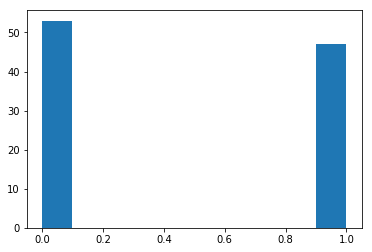

In [61]:
plt.hist(measurements)